In [42]:
# Sample linear regression with current data
import pandas as pd
import os
import statsmodels.api as sm
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


%matplotlib inline
path = os.system('pwd')
df = pd.read_pickle('btc_price_1yrs.pkl',compression='bz2')

In [43]:
temp = df[0]
tmp = temp.tolist()
btc_dict = {}
prices = [float(''.join(x[1].split('$'))) for x in tmp]
dates = [x[2] for x in tmp]
btc_dict['dates'] = dates
btc_dict['prices'] = prices
btc_df = pd.DataFrame(btc_dict)
btc_df.head()

y_values = pd.Series(prices)

In [44]:
interest = pd.read_csv('multiTimeline.csv', header=1, names=['Week','worldwide_interest'])
interest = np.array(interest.worldwide_interest).reshape(-1,1)
x_values = pd.DataFrame(interest)

In [62]:
model2 = sm.OLS(y_values,sm.add_constant(x_values)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     53.86
Date:                Fri, 13 Jul 2018   Prob (F-statistic):           1.77e-09
Time:                        13:20:23   Log-Likelihood:                -481.83
No. Observations:                  52   AIC:                             967.7
Df Residuals:                      50   BIC:                             971.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4610.6156    578.269      7.973      0.000    3449.128    5772.103
0            124.9394     17.025      7.339      0.000      90.744     159.134
==============================================================================
Omnibus:                        2.247   Durbin-Watson:                   0.391
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                1.415
Skew:                           0.107   Prob(JB):                        0.493
Kurtosis:                       2.221   Cond. No.                         54.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

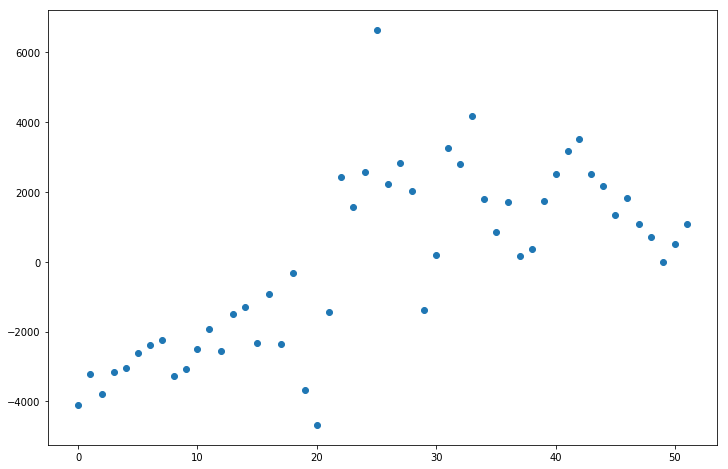

In [63]:
model2.resid.plot(style='o', figsize=(12,8))

In [47]:
from sklearn.cross_validation import train_test_split


model= LinearRegression()
model.fit(x_values,y_values)
model.score(x_values,y_values)
# plot the model and the points
 

0.5185695955087611

In [36]:
def plot_predict_and_points(x_values, y_values, model):
    y_predict = model.predict(x_values)

    plt.plot(x_values[:,0], y_values, 'ro')
    plt.plot(x_values[:,0], y_predict, 'b--')
    plt.xlabel('x')
    plt.ylabel('y')

#plot_predict_and_points(prices, interest.reshape(1,-1), model)
#plt.title('This IS the line that best fits the data');

In [49]:
#Split the data 80-20 train/test, specific random seed
x_train, x_test, y_train, y_test = train_test_split(interest, prices, test_size=0.2,random_state=42)
# using cross validation
model.fit(x_train,y_train)
model.score(x_test,y_test)

-0.47526162888585755

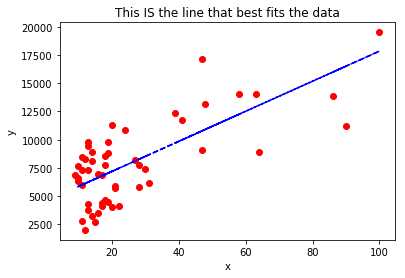

In [76]:
plot_predict_and_points(interest, prices, model)
plt.title('This IS the line that best fits the data');

In [51]:
# Second Feature - Nvidia graphics card 1070 price over last year

In [79]:
pixels = pd.read_csv('1070_downsampled.csv', header=1, names=['pix_x','pix_y'])
# these are approximate (make them more accurate by scraping new site)
pixel_to_price = 400/120.64
pixels_per_week = 62.75/4
pixel_date_offset = 305 # this may skew results 
down_sampled = pixels[pixels['pix_x'] > pixel_date_offset]
x = down_sampled['pix_y']*pixel_to_price




In [87]:
gtx_1070_price = x.tolist()
btc_price = prices 
global_interest = interest 

new_btc_df = pd.DataFrame(np.column_stack([btc_price, gtx_1070_price, global_interest]), \
                               columns=['btc_price', 'gtx_1070_price', 'global_interest'])


In [88]:
# Multivariate linear regression start
import seaborn as sns


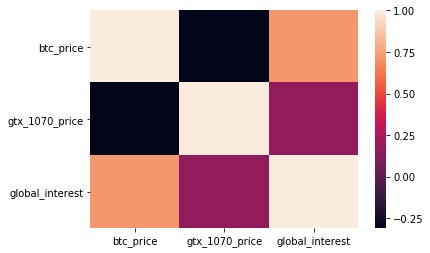

In [89]:
sns.heatmap(new_btc_df.corr())

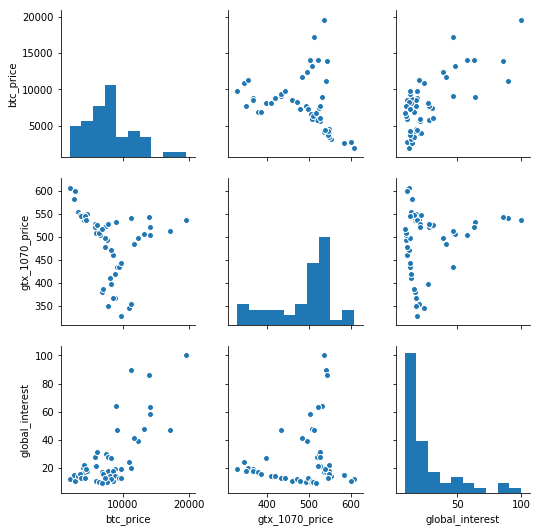

In [90]:
sns.pairplot(new_btc_df)

In [114]:
y_values = pd.Series(prices)
x_values = pd.DataFrame(np.column_stack([gtx_1070_price, global_interest]), \
                               columns=['gtx_1070_price', 'global_interest'])
new_btc_df.shape
model = sm.OLS(y_values,sm.add_constant(x_values)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     60.14
Date:                Fri, 13 Jul 2018   Prob (F-statistic):           6.45e-14
Time:                        14:33:44   Log-Likelihood:                -468.60
No. Observations:                  52   AIC:                             943.2
Df Residuals:                      49   BIC:                             949.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.574e+04   2004.382      7.853      0.000    1.17e+04    1.98e+04
gtx_1070_price    -23.4873      4.120     -5.700      0.000     -31.768     -15.207
global_interest   138.2141     13.537     10.210      0.000     111.010     165.418
==============================================================================
Omnibus:                        7.447   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.778
Skew:                           0.671   Prob(JB):                       0.0337
Kurtosis:                       4.151   Cond. No.                     3.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
X = new_btc_df.iloc[:,1:3].values

Text(0.5,1,'2-Feature residual plot')

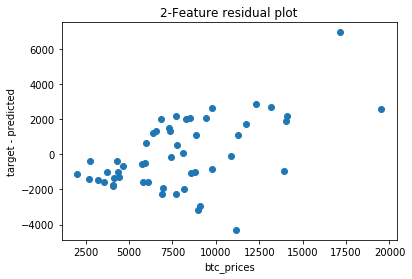

In [116]:
#sm.add_constant(X)
#y_values
predicted = model.predict(sm.add_constant(X))
resid = y_values - predicted
plt.plot(y_values,resid,'o')
plt.xlabel('btc_prices')
plt.ylabel('target - predicted')
plt.title("2-Feature residual plot")

In [ ]:
#boxcox if not normally distributed 